What are the price ranges for people with different budgets?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cities_df = pd.read_csv('resources/combined_data.csv')
cities_df.head()

,Unnamed: 0,Unnamed: 0.1,id,last_scraped,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,has_hot_tub,has_private_hot_tub,price,number_of_reviews,last_review,review_scores_accuracy,review_scores_location,review_scores_value,reviews_per_month
0,0,0,183319,2022-09-10,867995,f,Venice,33.99211,-118.47600,Entire home/apt,False,False,$152.00,3,2019-02-25,4.67,5.00,5.00,0.02
1,1,1,51307,2022-09-10,235568,f,Atwater Village,34.12206,-118.26783,Entire home/apt,False,False,$75.00,138,2020-12-13,4.77,4.95,4.76,0.98
2,2,2,184314,2022-09-10,884031,f,Venice,33.97487,-118.46312,Entire home/apt,False,False,$125.00,30,2017-12-24,4.93,4.89,4.85,0.22
3,3,3,51498,2022-09-10,236758,f,Mar Vista,34.00389,-118.44126,Entire home/apt,False,False,$189.00,378,2022-08-21,4.83,4.83,4.74,2.60
4,4,4,109,2022-09-10,521,f,Culver City,33.98301,-118.38607,Entire home/apt,False,False,$115.00,2,2016-05-15,5.00,5.00,4.00,0.01


In [3]:
price_df = cities_df.loc[cities_df["has_hot_tub"] == True].reset_index()
price_df.head()

,index,Unnamed: 0,Unnamed: 0.1,id,last_scraped,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,has_hot_tub,has_private_hot_tub,price,number_of_reviews,last_review,review_scores_accuracy,review_scores_location,review_scores_value,reviews_per_month
0,6,6,6,2708,2022-09-10,3008,t,Hollywood,34.096250,-118.346050,Private room,True,False,$93.00,37,2022-03-19,4.81,5.00,4.86,0.37
1,22,22,22,6931,2022-09-10,3008,t,Hollywood,34.094903,-118.347658,Private room,True,False,$109.00,30,2022-08-01,4.85,4.73,4.73,0.19
2,27,27,27,7992,2022-09-10,22363,t,Atwater Village,34.113640,-118.260680,Entire home/apt,True,True,$100.00,269,2022-08-07,4.95,4.94,4.89,2.04
3,32,32,32,65467,2022-09-10,61864,f,Culver City,34.024380,-118.383740,Private room,True,True,$300.00,0,NaN,NaN,NaN,NaN,NaN
4,35,35,35,67089,2022-09-10,210344,t,Culver City,34.009850,-118.407980,Entire home/apt,True,False,$140.00,684,2022-07-20,4.95,4.91,4.87,4.81


In [4]:
price_df['price'] = price_df['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [5]:
clean_df = price_df[['id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'has_hot_tub', 'has_private_hot_tub', 
                    'price']]
clean_df.head()

,id,neighbourhood_cleansed,latitude,longitude,has_hot_tub,has_private_hot_tub,price
0,2708,Hollywood,34.096250,-118.346050,True,False,93.0
1,6931,Hollywood,34.094903,-118.347658,True,False,109.0
2,7992,Atwater Village,34.113640,-118.260680,True,True,100.0
3,65467,Culver City,34.024380,-118.383740,True,True,300.0
4,67089,Culver City,34.009850,-118.407980,True,False,140.0


In [6]:
print(clean_df['price'].min())
print(clean_df['price'].max())

10.0
30000.0


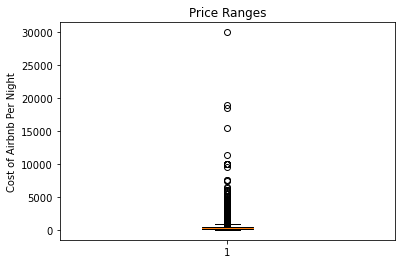

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title('Price Ranges')
ax1.set_ylabel('Cost of Airbnb Per Night')
ax1.boxplot(clean_df['price'])
plt.show()

In [8]:
bins = [0, 500, 1000, 5000, 10000, 30000]
group_names = ["<$500", "$500-1000", "$1000-5000", "$5000-10000", "$10000-30000"]

In [9]:
clean_df["price groups"] = pd.cut(clean_df["price"], bins, labels=group_names, include_lowest=True)
clean_df.head()

C:\Users\Isabella Taylor\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,neighbourhood_cleansed,latitude,longitude,has_hot_tub,has_private_hot_tub,price,price groups
0,2708,Hollywood,34.096250,-118.346050,True,False,93.0,<$500
1,6931,Hollywood,34.094903,-118.347658,True,False,109.0,<$500
2,7992,Atwater Village,34.113640,-118.260680,True,True,100.0,<$500
3,65467,Culver City,34.024380,-118.383740,True,True,300.0,<$500
4,67089,Culver City,34.009850,-118.407980,True,False,140.0,<$500


In [10]:
grouped = clean_df.groupby("price groups")
grouped.count()

,id,neighbourhood_cleansed,latitude,longitude,has_hot_tub,has_private_hot_tub,price
price groups,,,,,,,
<$500,5627,5627,5627,5627,5627,5627,5627
$500-1000,924,924,924,924,924,924,924
$1000-5000,556,556,556,556,556,556,556
$5000-10000,23,23,23,23,23,23,23
$10000-30000,5,5,5,5,5,5,5


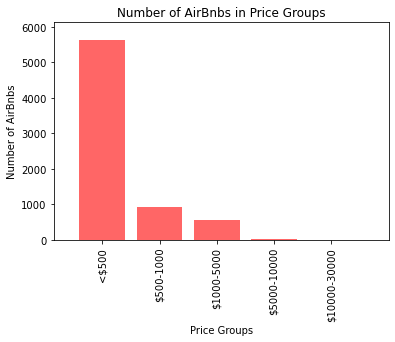

In [11]:
price_sum = clean_df.groupby("price groups").count()["has_hot_tub"]
groups = clean_df["price groups"].unique()

plt.bar(groups, price_sum, color = 'red', alpha = 0.6, align = 'center')
plt.xlim(-0.85, len(groups))
plt.ylim(0, max(price_sum)+500)

tick_location = [value for value in groups]
plt.xticks(tick_location, rotation = 'vertical')

plt.title("Number of AirBnbs in Price Groups")
plt.xlabel("Price Groups")
plt.ylabel("Number of AirBnbs");

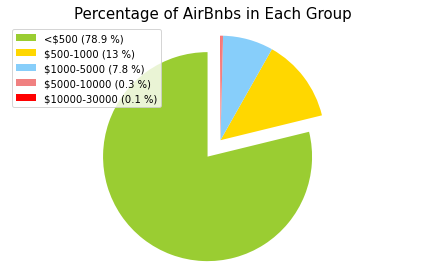

In [12]:
labels = [r'<$500 (78.9 %)', r'$500-1000 (13 %)', 
r'$1000-5000 (7.8 %)', r'$5000-10000 (0.3 %)', r'$10000-30000 (0.1 %)']
sizes = [78.9, 13, 7.8, 0.3, 0.1]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
explode = (0.2, 0, 0, 0, 0)

patches, texts = plt.pie(sizes, colors=colors, startangle=90, explode = explode)
plt.legend(patches, labels, loc="best")

plt.title("Percentage of AirBnbs in Each Group", fontsize = 15)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
# SUMMARY: Overall there are significantly more AirBnbs in the $0-500 range, accounting for 78.9% of all hottub AirBnbs 
# in Northern and Southern California. The pricier the AirBnbs get, the less prominent they become. 13% of all hottub 
# Airbnbs are in the $500-1,000 range. Then 7.8% of hottub AirBnbs cost $1,000-5,000. Only 0.3% of the AirBnbs cost 
# $5,000-10,000, and a minuscule 0.1% of all hottub AirBnbs are in the price range of $10,000-30,000.